In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
insurance_data = pd.read_csv("insurance.csv")

In [94]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [95]:
insurance_data.shape

(1338, 7)

In [96]:
insurance_data["age"].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [97]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [98]:
# Dropping region column
insurance_data.drop("region",axis=1, inplace=True)

# Outlier Detection

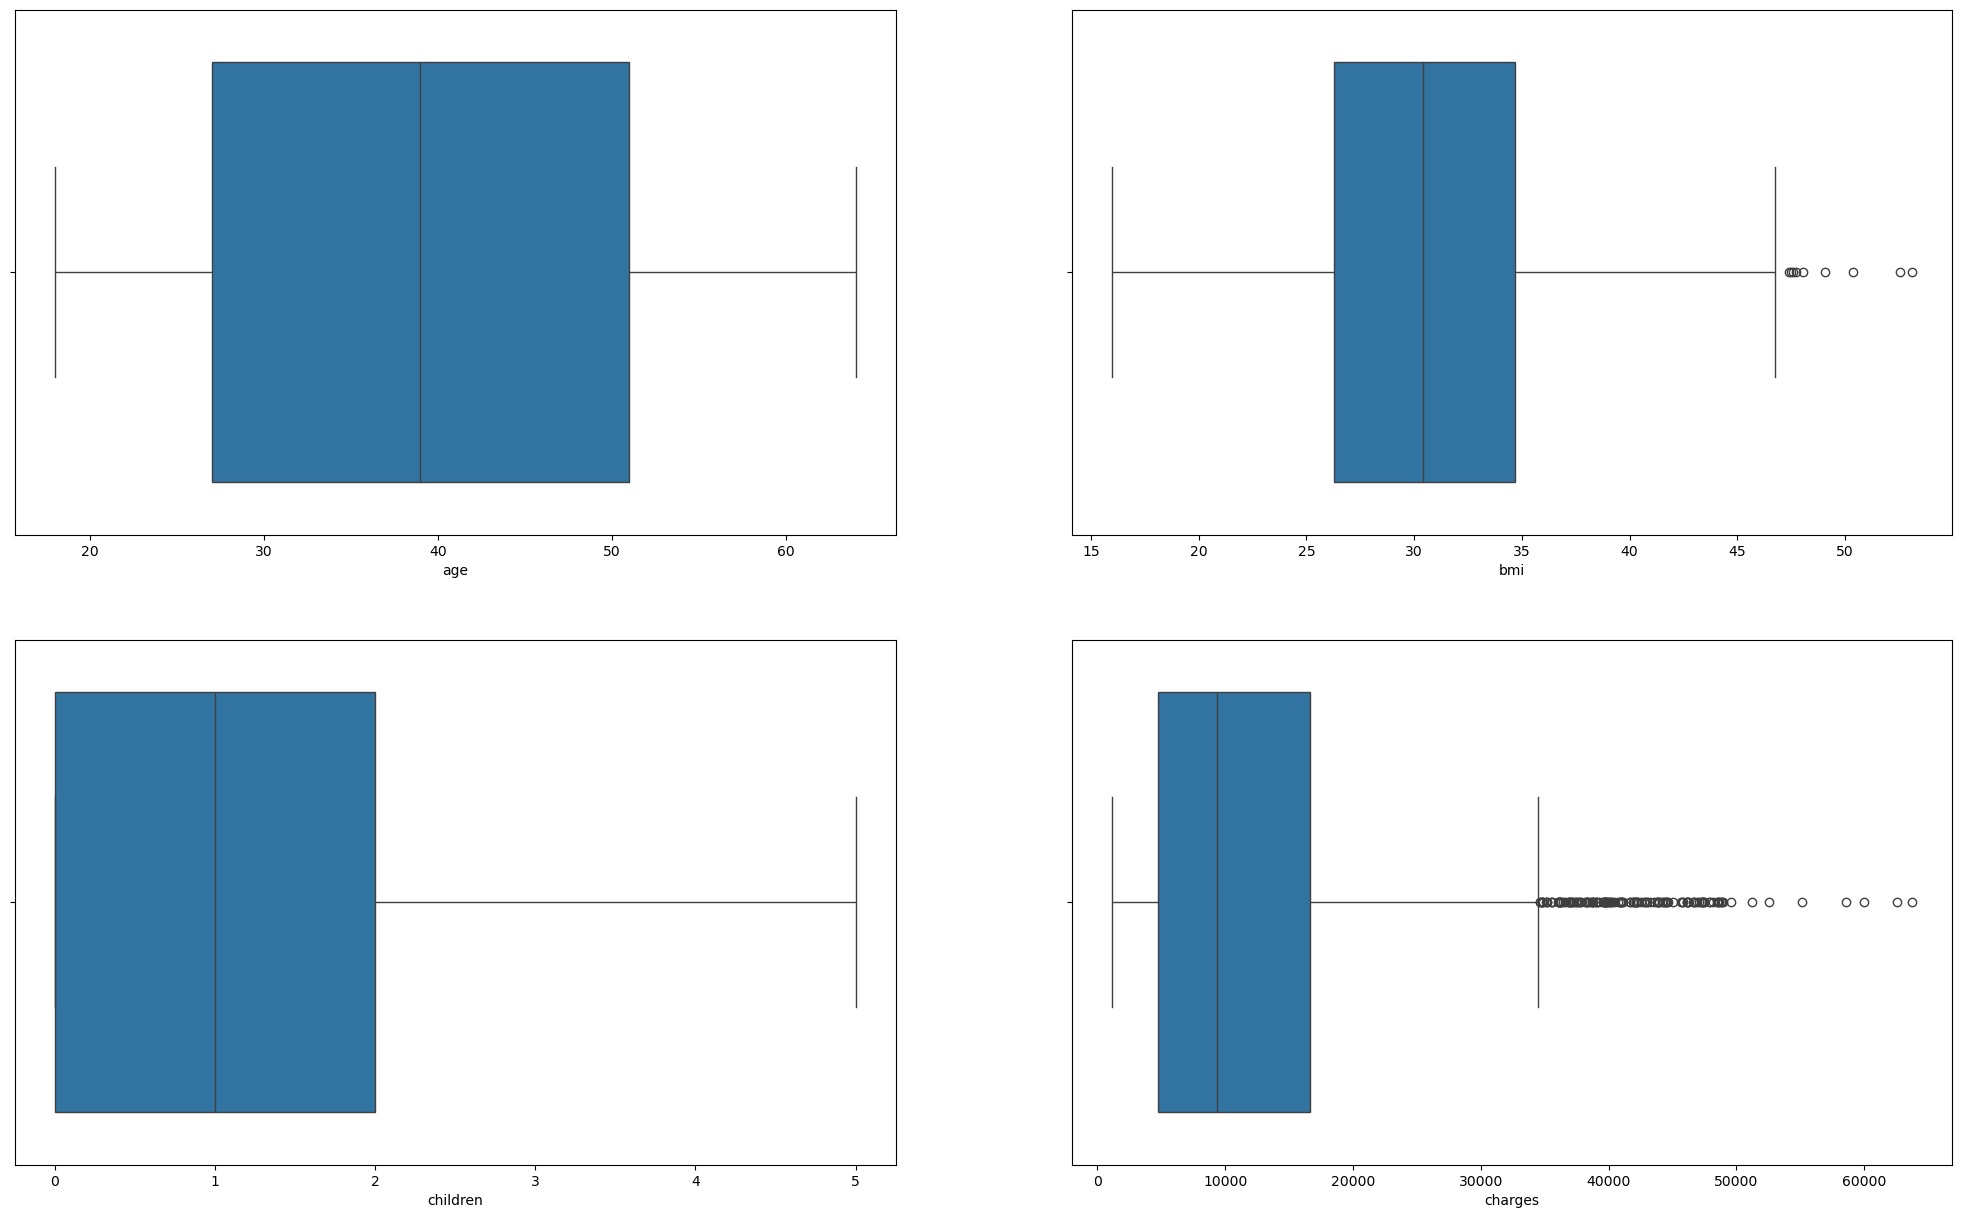

In [99]:
# Finding outliers in columns
plt.figure(figsize=(25,15))
plt.subplot(2,2,1)
sns.boxplot(insurance_data['age'], orient='h')

plt.subplot(2,2,2)
sns.boxplot(insurance_data['bmi'], orient='h')

plt.subplot(2,2,3)
sns.boxplot(insurance_data['children'], orient='h')

plt.subplot(2,2,4)
sns.boxplot(insurance_data['charges'], orient='h')

plt.show()

# Finding

* "bmi" and "charges" columns have ouliers in higher end

C:\Users\shashank\AppData\Local\Temp\ipykernel_6972\442178837.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['bmi'])
C:\Users\shashank\AppData\Local\Temp\ipykernel_6972\442178837.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['charges'])


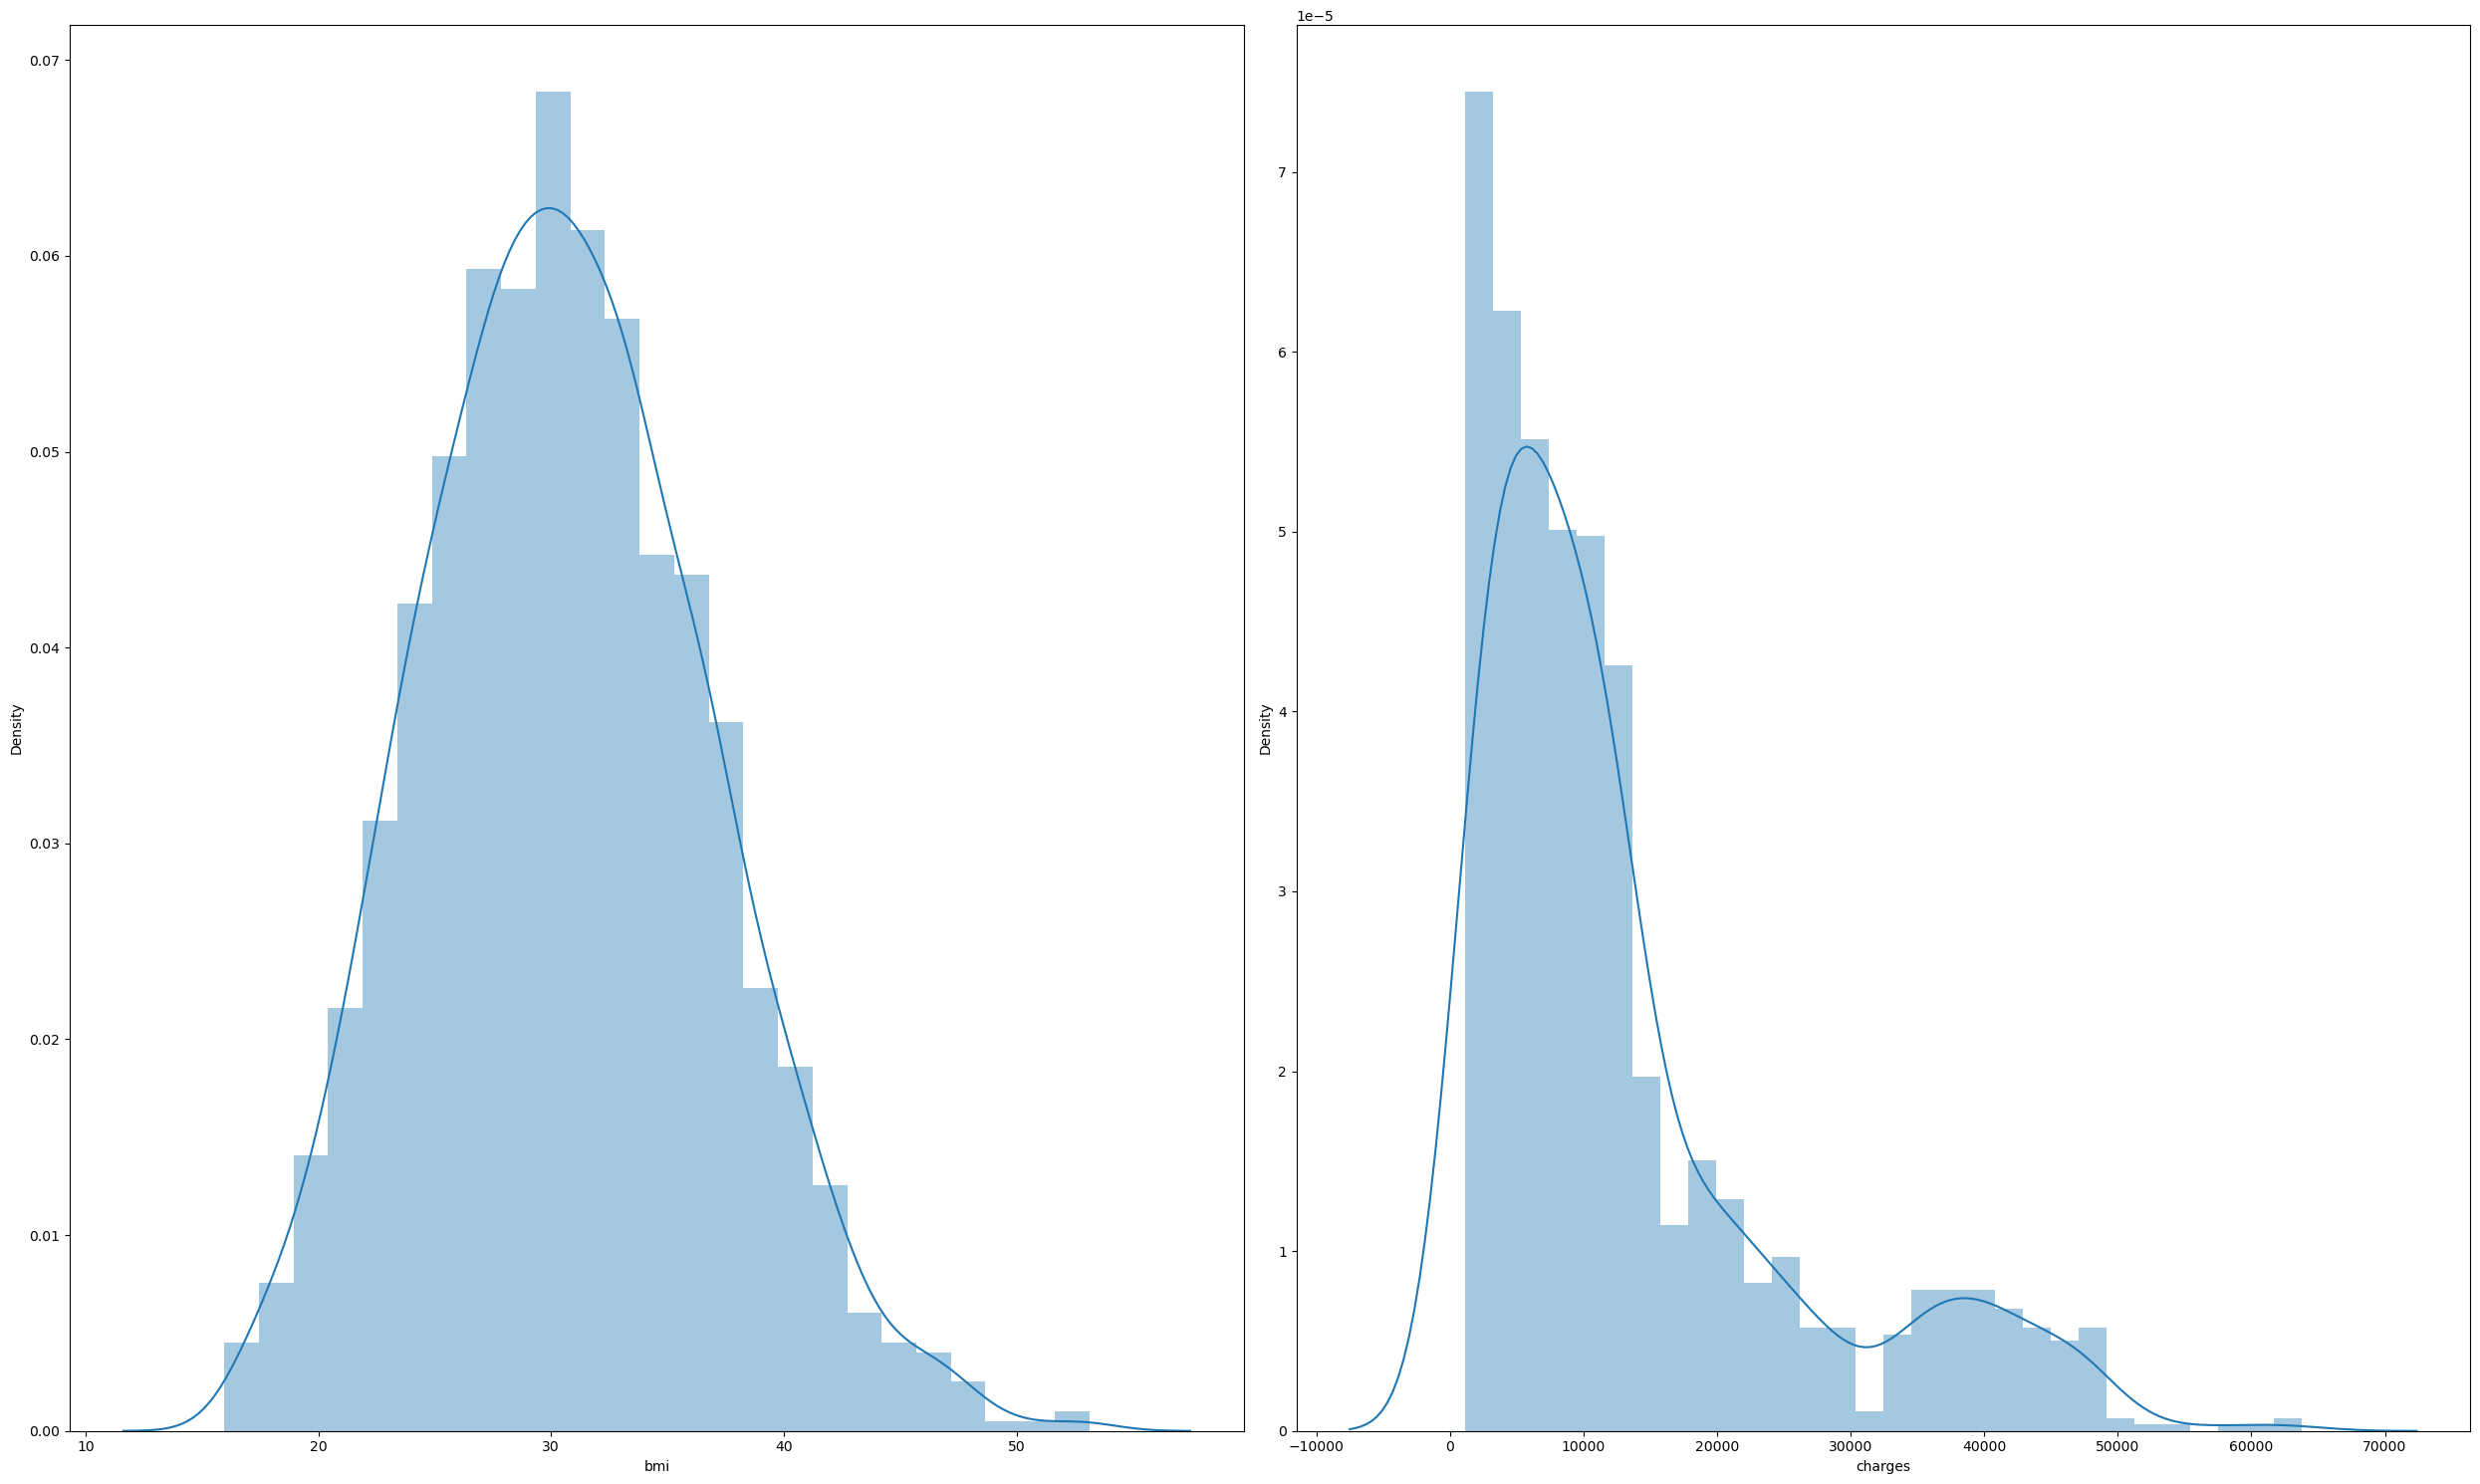

In [100]:
plt.figure(figsize=(25,15))

plt.subplot(1,2,1)
sns.distplot(insurance_data['bmi'])

plt.subplot(1,2,2)
sns.distplot(insurance_data['charges'])

plt.tight_layout()
plt.show()

In [101]:
# Fixing outlier in bmi column using z-score
per_25_b = insurance_data['bmi'].quantile(0.25)
per_75_b = insurance_data['bmi'].quantile(0.75)

iqr_b = per_75_b - per_25_b

max_val_b = per_75_b + (1.5 * iqr_b)
insurance_data['bmi'] = np.where(
    insurance_data['bmi'] > max_val_b,
    max_val_b,
    insurance_data['bmi']
)

In [102]:
# Fixing outlier in charges column using IQR
per_25 = insurance_data['charges'].quantile(0.25)
per_75 = insurance_data['charges'].quantile(0.75)

iqr = per_75 - per_25

max_val = per_75 + (1.5 * iqr)
mix_val = per_25 - (1.5*iqr)
insurance_data['charges'] = np.where(
    insurance_data['charges'] > max_val,
    max_val,
    insurance_data['charges']
)
max_val,iqr,per_75,per_25

(np.float64(34489.350562499996),
 np.float64(11899.625365),
 np.float64(16639.912515),
 np.float64(4740.28715))

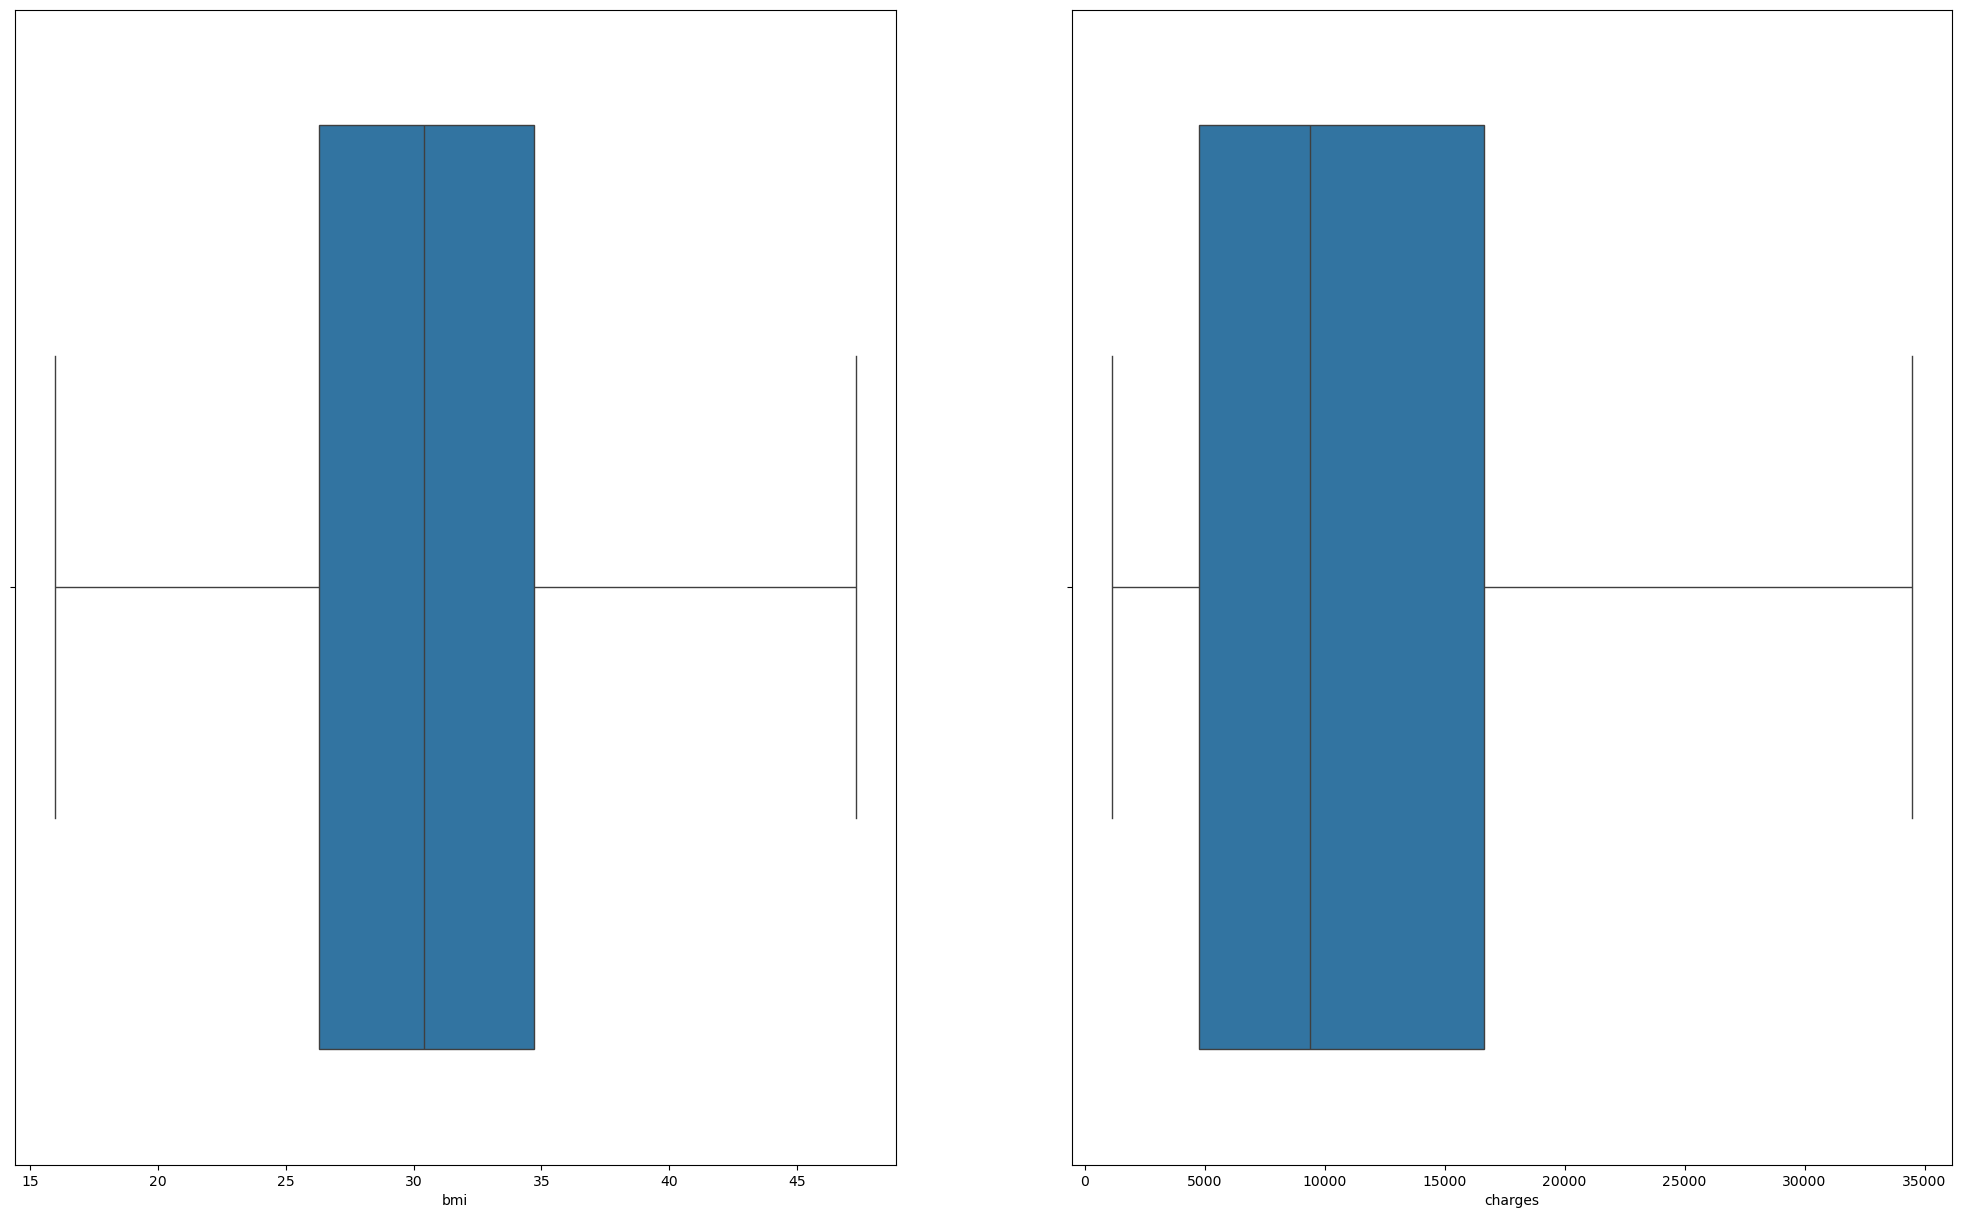

In [103]:
# Finding outliers in columns
plt.figure(figsize=(25,15))

plt.subplot(1,2,1)
sns.boxplot(insurance_data['bmi'], orient='h')

plt.subplot(1,2,2)
sns.boxplot(insurance_data['charges'], orient='h')

plt.show()

In [104]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.650034,1.094918,12479.369251
std,14.049960,6.056926,1.205493,10158.056096
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,47.290000,5.000000,34489.350562


In [105]:
insurance_data.shape

(1338, 6)

# EDA

# Smoker's count

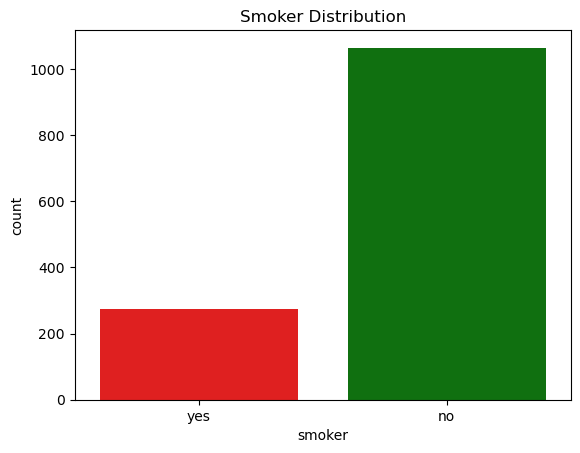

In [106]:
sns.countplot(
    x="smoker",
    data=insurance_data,
    hue="smoker",
    palette={"yes": "red", "no": "green"}
)
plt.title("Smoker Distribution")
plt.show()

# Interpretation

Majority of non-smoker

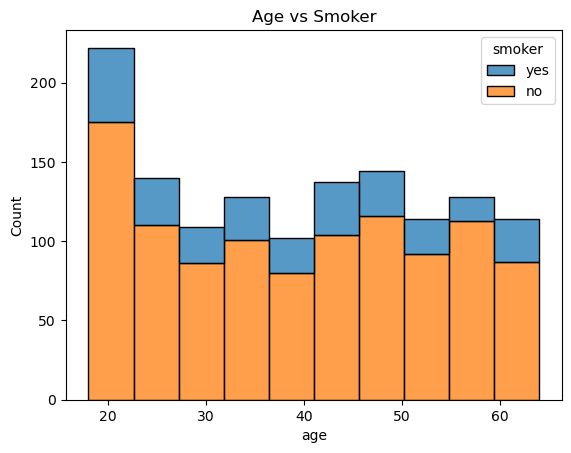

In [107]:
# No. of smokers within each age group
sns.histplot(
    data=insurance_data,
    x="age",
    hue="smoker",
    multiple="stack",
    bins=10
)
plt.title("Age vs Smoker")
plt.show()

# Interpretation

* The proportion of smokers in early ages are higher.
* Smokers count in each group is less than non-smoker count.

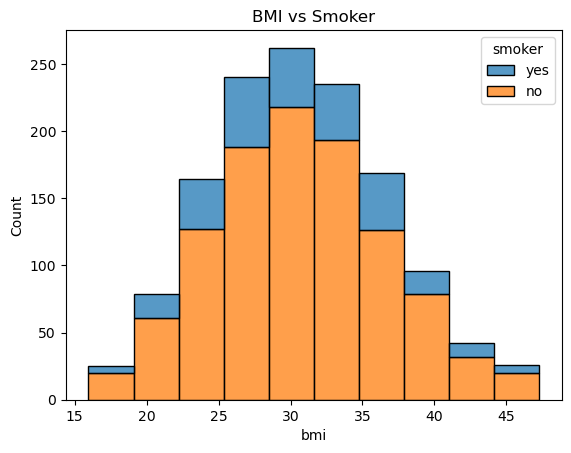

In [108]:
# No. of smokers within bmi range
sns.histplot(
    data=insurance_data,
    x="bmi",
    hue="smoker",
    multiple="stack",
    bins=10
)
plt.title("BMI vs Smoker")
plt.show()

# Interpretation

* Most values of BMI lies between 25-35
* 25-35 BMI coustomers have a higher smoker count
* Some oultiers (very high BMI)

<Axes: xlabel='charges', ylabel='Count'>

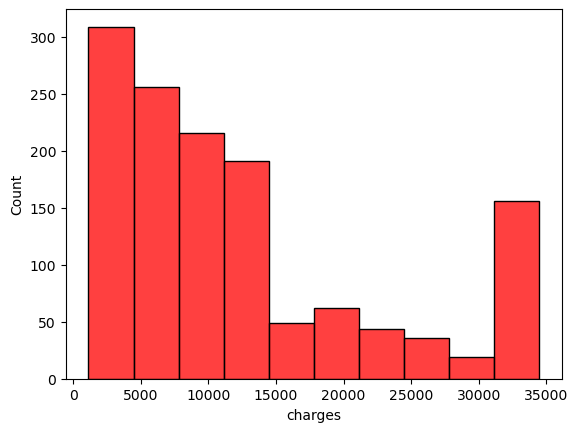

In [109]:
# charges count
sns.histplot(insurance_data["charges"],bins=10,color="red")

# Interpretation

* Right skewed data
* Few people have extremetly high medical costs

# Charges vs smoker

<Axes: xlabel='smoker', ylabel='charges'>

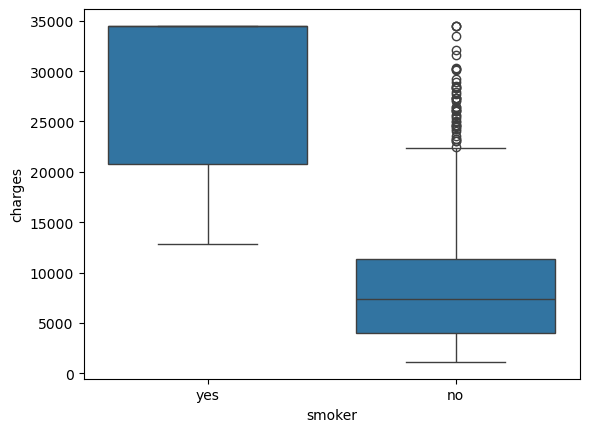

In [110]:
sns.boxplot(x="smoker", y="charges", data=insurance_data)

# Interpretation

* Smokers have much higher medical costs than non-smoker 
* Non-smokers have some outliers with higher medical cost due to higher BMI and no. of children

In [111]:
print(insurance_data[(insurance_data['charges']>22000) & (insurance_data['smoker'] == 'no')].count)

<bound method DataFrame.count of       age     sex     bmi  children smoker       charges
9      60  female  25.840         0     no  28923.136920
62     64    male  24.700         1     no  30166.618170
115    60    male  28.595         0     no  30259.995560
138    54  female  31.900         3     no  27322.733860
140    34    male  22.420         2     no  27375.904780
219    24  female  23.210         0     no  25081.767840
227    58  female  41.910         0     no  24227.337240
242    55  female  26.800         1     no  34489.350562
245    54    male  30.020         0     no  24476.478510
289    52    male  26.400         3     no  25992.821040
321    26  female  29.640         4     no  24671.663340
355    46    male  27.600         0     no  24603.048370
379    62    male  31.460         1     no  27000.984730
387    50    male  25.365         2     no  30284.642940
430    19    male  33.100         0     no  23082.955330
443    59  female  36.520         1     no  28287.89766

# Age vs charges

<Axes: xlabel='age', ylabel='charges'>

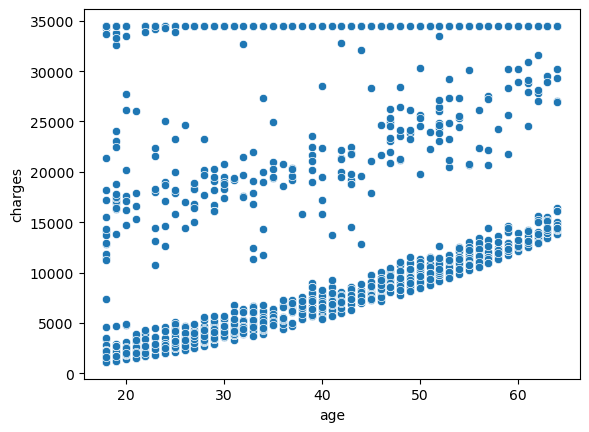

In [112]:
sns.scatterplot(x="age", y="charges", data=insurance_data)

# Interpretation

* Charges increase with age.
* Older people spend more on healthcase

# Charges vs BMI

<Axes: xlabel='bmi', ylabel='charges'>

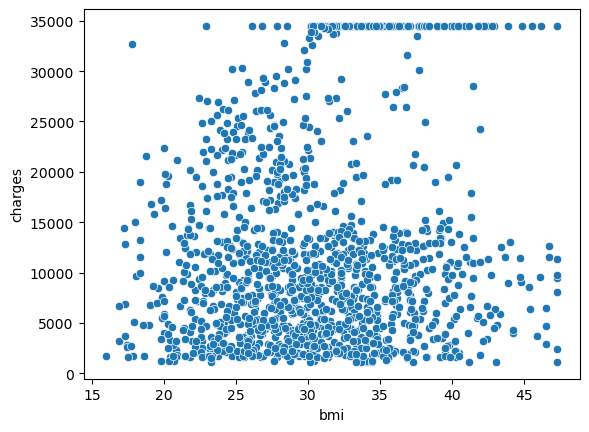

In [113]:
sns.scatterplot(x="bmi", y="charges", data=insurance_data)

# Interpretation

* Higher BMI implies higher charges.
* Obesity increase health risk.

# Charges vs Children

<Axes: xlabel='children', ylabel='charges'>

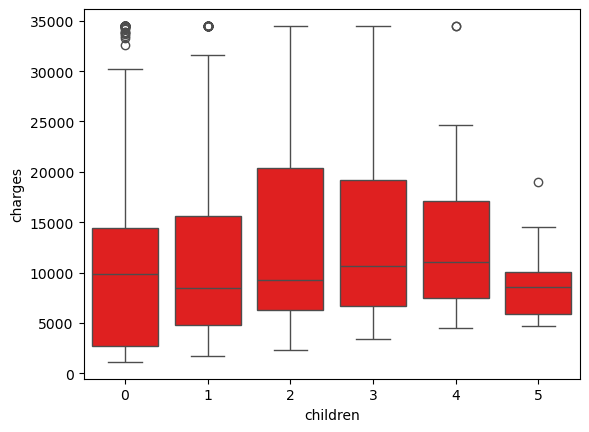

In [114]:
sns.boxplot(x="children", y="charges", data=insurance_data, color="red")

# Interpretation

* Slightly increase with no. of children
* Not a strong effect
* The outliers in each case with higher charges is because they are smokers

# Heatmap

<Axes: >

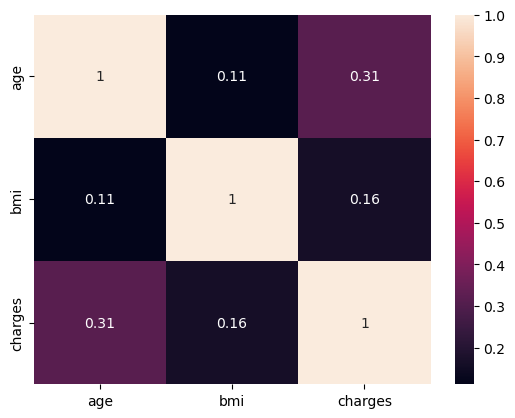

In [115]:
sns.heatmap(insurance_data[["age","bmi","charges"]].corr(), annot=True)

In [116]:
insurance_data.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [117]:
insurance_data.to_csv('Cleaned_Insurance_data.csv')

# Model

In [118]:
X = insurance_data.drop(columns = 'charges') # input features
Y = insurance_data['charges'] # output features

In [163]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

In [155]:
ohe = OneHotEncoder()
ohe.fit(X[['sex', 'smoker']])

OneHotEncoder()

In [156]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['sex', 'smoker']),
                                      remainder='passthrough')

In [157]:
scores = []
for i in range(1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=i)
    lr = LinearRegression()
    pipe = make_pipeline(column_trans, lr)
    pipe.fit(X_train,Y_train)
    y_pred = pipe.predict(X_test)
    scores.append(r2_score(Y_test, y_pred))

In [158]:
np.argmax(scores)

np.int64(367)

In [159]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=367)
lr = LinearRegression()
pipe = make_pipeline(column_trans, lr)
pipe.fit(X_train,Y_train)
y_pred = pipe.predict(X_test)

In [187]:
print("Linear Regression R2:", r2_score(Y_test,y_pred))

Linear Regression R2: 0.8388320421017875


In [167]:
from sklearn.ensemble import RandomForestRegressor

In [190]:
rf_model = Pipeline(steps=[
    ('preprocessor', column_trans),
    ('model', RandomForestRegressor(
        n_estimators=500,
        max_depth=10,
        min_samples_leaf=2,
        random_state=42
    ))
])
rf_model.fit(X_train, Y_train)
y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(Y_test, y_pred_rf)

print("Random Forest R2:", r2_rf)

Random Forest R2: 0.8489697514146587


# Prediction

In [146]:
insurance_data.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [127]:
def input_block():
    try:
        age = int(input("Enter your age: "))
    except ValueError:
        print("Enter a number.")
        age = int(input("Enter your age: "))
    
    try:
        sex = input("Enter your sex: ").lower()
        if sex not in ["male","female"]:
            raise ValueError("Must enter either female or male.")
    except ValueError as e:
        print(e)
        sex = input("Enter your sex: ").lower()
    
    try:
        bmi = float(input("Enter your BMI: "))
    except ValueError:
        print("Enter a number.")
        bmi = float(input("Enter your BMI: "))
    
    try:
        smoker = input("Are you a smoker, yes or no: ").lower()
        if smoker not in ["yes","no"]:
            raise ValueError("Must enter either yes or no.")
    except ValueError as e:
        print(e)
        smoker = input("Are you a smoker, yes or no: ").lower()

    try:
        children = int(input("Enter no. of children you have: "))
    except ValueError:
        smoker = input("Are you a smoker, yes or no: ").lower()

    return age, sex, bmi, children, smoker

In [189]:
age, sex, bmi, children, smoker = input_block()

charges_rf = rf_model.predict(pd.DataFrame([[age,sex,bmi,children,smoker]], columns=['age', 'sex', 'bmi', 'children','smoker']))

charges_lr, charges_rf

Enter your age:  25
Enter your sex:  male
Enter your BMI:  22.5
Are you a smoker, yes or no:  yes
Enter no. of children you have:  0


(array([22640.70366434]), array([15801.97279305]))

In [186]:
# Dumping the pipeline
import pickle

In [187]:
pickle.dump(pipe, open('LinearRegressionModel.pkl', 'wb'))